# Startup Case Study
Analysing the growth of Indian Startups.
### We need to conclude the following points.
 How the funding ecosystem has changed in India
 - What is the general amount that startups get in India.
 - How the number of startups have increased.<br>
 - What are the industries that are more preffered for startups<br>
 - What are the funding options that are available<br> 
 - How location plays important role 
 - Who play an important role in Indian Startup System <br>
We will be using EDA for concluding the above points. Exploratory Data Analysis(EDA) refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

In [1]:
## Importing Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset
The dataset used is startup_funding.csv

In [2]:
df_startup=pd.read_csv("./startup_funding.csv")

In [3]:
df_startup.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [4]:
df_startup.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD', 'Remarks'],
      dtype='object')

### Data Cleaning

In [5]:
#Finding number of total null values in each column and their respective percentages
nul_val=df_startup.isna().sum()
null_percent= (nul_val/df_startup.isna().count())*100
missing=pd.concat([nul_val,null_percent],axis=1,keys=["Total","Percentage %"])
print(missing)

                   Total  Percentage %
Sr No                  0      0.000000
Date dd/mm/yyyy        0      0.000000
Startup Name           0      0.000000
Industry Vertical    171      5.617608
SubVertical          936     30.749014
City  Location       180      5.913272
Investors Name        24      0.788436
InvestmentnType        4      0.131406
Amount in USD        960     31.537451
Remarks             2625     86.235217


Remarks contains maximum number of null values 86% therefore we can even remove the column from the dataframe

In [6]:
# the dataframe contains \\xc2\\xa0 which is needed to be replaced with ""
df_startup.iloc[185,:]

Sr No                                                              186
Date dd/mm/yyyy                                             26/08/2018
Startup Name                                               Shubh Loans
Industry Vertical                                             Fin-Tech
SubVertical             \\xc2\\xa0Customer Sourcing Platform\\xc2\\xa0
City  Location                                               Bengaluru
Investors Name       Saama Capital, SRI Capital, Beenext, and Prave...
InvestmentnType                                         Private Equity
Amount in USD                                                42,00,000
Remarks                                                            NaN
Name: 185, dtype: object

In [7]:
def clean_str(x):
    return str(x).replace("\\xc2\\xa0","").replace("\\\\xc2\\\\xa0","")

In [8]:
for col in df_startup.columns:
    df_startup[col]=df_startup[col].apply(lambda x:clean_str(x))

In [9]:
df_startup.iloc[185,:]

Sr No                                                              186
Date dd/mm/yyyy                                             26/08/2018
Startup Name                                               Shubh Loans
Industry Vertical                                             Fin-Tech
SubVertical                                 Customer Sourcing Platform
City  Location                                               Bengaluru
Investors Name       Saama Capital, SRI Capital, Beenext, and Prave...
InvestmentnType                                         Private Equity
Amount in USD                                                42,00,000
Remarks                                                            nan
Name: 185, dtype: object

In [10]:
df_startup.drop(['Remarks'],axis=1,inplace=True)
df_startup.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD'],
      dtype='object')

In [11]:
df_startup['Amount in USD']

0       20,00,00,000
1          80,48,394
2        1,83,58,860
3          30,00,000
4          18,00,000
            ...     
3039       45,00,000
3040        8,25,000
3041       15,00,000
3042             nan
3043        1,40,000
Name: Amount in USD, Length: 3044, dtype: object

In [21]:
#Converting the 'Amount in USD' column in complete numeric,i.e. replacing' ,+ undisclosed nan' with ''
def CleanAmount(x):
    x=''.join([c for c in str(x) if c in['0','1','2','3','4','5','6','7','8','9']])
    x=str(x).lower().replace(',','').replace('+','')
    x=str(x).lower().replace('NaN','')
    x=str(x).lower().replace('undisclosed','')
    if x=='':
        x="-999"
    return x
df_startup["Amount in USD"]=df_startup["Amount in USD"].apply(lambda x:float(CleanAmount(x)))
df_startup["Amount in USD"]

0       2.000000e+09
1       8.048394e+07
2       1.835886e+08
3       3.000000e+07
4       1.800000e+07
            ...     
3039    4.500000e+07
3040    8.250000e+06
3041    1.500000e+07
3042    9.990000e+03
3043    1.400000e+06
Name: Amount in USD, Length: 3044, dtype: float64

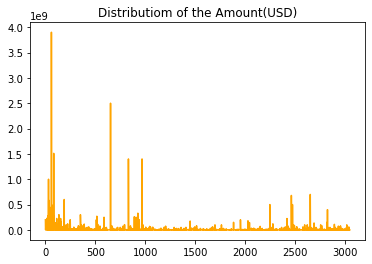

In [13]:
#Plotting the 'Amount In USD' column
df_startup['Amount in USD'].plot(kind='line',color='orange')
plt.title("Distributiom of the Amount(USD)")
plt.show()

In [14]:
df_startup.iloc[192,1]

'05/072018'

In [15]:
df_startup[df_startup['Date dd/mm/yyyy']=='05/072018']='05/07/2018'
df_startup[df_startup['Date dd/mm/yyyy']=='12/05.2015']='12/05/2015'
df_startup[df_startup['Date dd/mm/yyyy']=='13/04.2015']='13/04/2015'
df_startup[df_startup['Date dd/mm/yyyy']=='15/01.2015']='15/01/2015'
df_startup[df_startup['Date dd/mm/yyyy']=='22/01//2015']='22/01/2015'
df_startup[df_startup['Date dd/mm/yyyy']=='01/07/015']='01/07/2015'
df_startup[df_startup['Date dd/mm/yyyy']=='\\\\xc2\\\\xa010/7/2015']='10/07/2015'

In [16]:
df_startup['Date dd/mm/yyyy']

0       09/01/2020
1       13/01/2020
2       09/01/2020
3       02/01/2020
4       02/01/2020
           ...    
3039    29/01/2015
3040    29/01/2015
3041    30/01/2015
3042    30/01/2015
3043    31/01/2015
Name: Date dd/mm/yyyy, Length: 3044, dtype: object

### How Does Funding Ecosystem Changes With Time?

In [17]:
df_startup['Date dd/mm/yyyy'].dtype
df_startup['Date dd/mm/yyyy']=pd.to_datetime(df_startup['Date dd/mm/yyyy'],format='%d/%m/%y',infer_datetime_format=True)

'O' is the code for Object. The datatype for 'Date dd/mm/yyyy' is object.<br> We need to convert our date columns to datetime.
Now that we know that our date column isn't being recognized as a date, it's time to convert it so that it is recognized as a date. This is called "parsing dates" because we're taking in a string and identifying its component parts. We will use to_datetime() method.

In [18]:
df_startup['Year_month']=(df_startup['Date dd/mm/yyyy'].dt.year*100) + (df_startup['Date dd/mm/yyyy'].dt.month)
temp=df_startup['Year_month'].value_counts().sort_values(ascending=False).head(10)
print("Number of Funding per month in decreasing order:\n",temp)
y_m=df_startup['Year_month'].value_counts()

Number of Funding per month in decreasing order:
 201604    102
201601    100
201509     98
201608     95
201507     94
201606     93
201511     89
201503     85
201508     83
201612     82
Name: Year_month, dtype: int64


dt can be used to access the values of the series as datetimelike and return several properties but can only use .dt accessor with datetimelike values. Therefore, we changed the dtype of 'Date dd/mm/yyyy'.

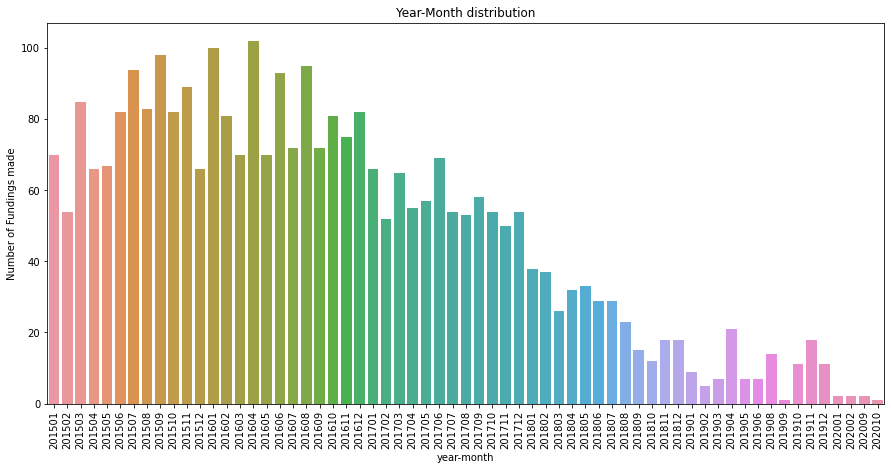

In [19]:
plt.rcParams['figure.figsize']=(15,7)
sns.barplot(y_m.index,y_m.values)
plt.xticks(rotation=90)
plt.xlabel('year-month')
plt.ylabel("Number of Fundings made")
plt.title("Year-Month distribution")
plt.show()

We see that January and June of 2016 have the highest funding and the number of funding have decreased exponentially after 2016.

### What is the general Amount that startups get in India?

In [22]:
#Maximum funding for a startup
print("The maximum funding for a startup: ",df_startup["Amount in USD"].dropna().sort_values().max())
print("Name: ",df_startup[df_startup['Amount in USD']==39000000000.0]['Startup Name'])

The maximum funding for a startup:  39000000000.0
Name:  60    Rapido Bike Taxi
Name: Startup Name, dtype: object


The interact function (ipywidgets.interact) automatically creates user interface (UI) controls for exploring code and data interactively. 

In [23]:
#Checking the startups with funds greater than 50crore funding
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
@interact
def check(column='Amount in USD',x=50000000):
    return df_startup[df_startup[column]>x].sort_values(by='Amount in USD',ascending=False)

interactive(children=(Text(value='Amount in USD', description='column'), IntSlider(value=50000000, description…

In [24]:
#Minimum funding for a startup
print("Minimum funding for the startup: ",df_startup['Amount in USD'].dropna().sort_values().min())

Minimum funding for the startup:  9990.0


It shows that there are startups with zero funding.

In [25]:
#Let's check the startups with least funding
df_startup[['Amount in USD','Startup Name']].sort_values(by='Amount in USD',ascending=True).head()

,Amount in USD,Startup Name
756,9990.0,EazyDiner
1261,9990.0,HelpChat
708,9990.0,FableStreet
709,9990.0,Monsoon Fintech
710,9990.0,MonkeyBox


In [26]:
#Number of startups with zero funding
df_startup[df_startup['Amount in USD']==-999].shape

(0, 10)

There are total 971 startups with zero funding

In [27]:
#Average funding
print("Average funding for Indian Startups: ",df_startup['Amount in USD'].dropna().sort_values().mean())

Average funding for Indian Startups:  132699730.01576872


In [28]:
#Number of funding each startup got
print("Total startups funded: ",len(df_startup["Startup Name"].unique()))
startup=df_startup["Startup Name"].value_counts().head()
print(startup)

Total startups funded:  2458
Swiggy      8
Ola Cabs    8
Paytm       7
Meesho      6
NoBroker    6
Name: Startup Name, dtype: int64


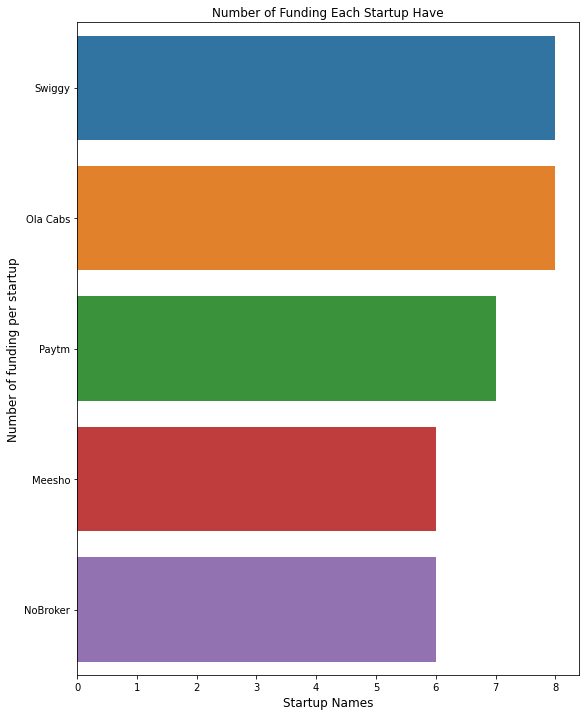

In [29]:
#Plotting the data
plt.rcParams['figure.figsize']=(9,12)
sns.barplot(x=startup.values,y=startup.index)
plt.xlabel('Startup Names',fontsize=12)
plt.ylabel('Number of funding per startup',fontsize=12)
plt.title("Number of Funding Each Startup Have")
plt.show()

Swiggy and OlaCabs have highest funding among all the startups.

### Which Industries are more preffered for startups?

In [30]:
df_startup["Industry Vertical"]=df_startup["Industry Vertical"].replace('nan','Consumer Technology')
industry=df_startup['Industry Vertical'].value_counts().head()
print(industry)

Consumer Internet      940
Technology             478
eCommerce              186
Consumer Technology    170
Healthcare              70
Name: Industry Vertical, dtype: int64


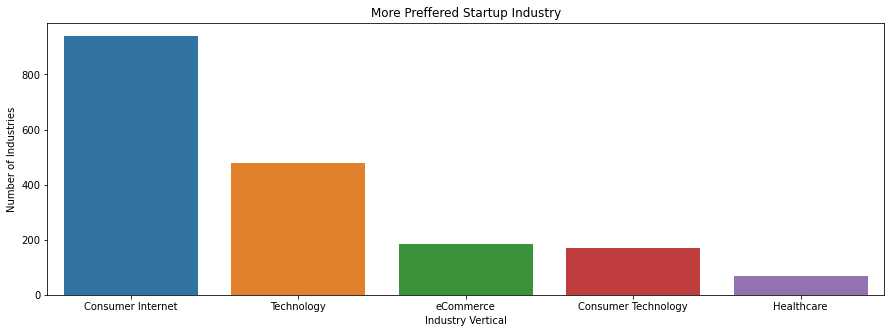

In [31]:
#Plotting the data
plt.rcParams['figure.figsize']=(15,5)
sns.barplot(x=industry.index,y=industry.values)
plt.xlabel("Industry Vertical")
plt.ylabel("Number of Industries")
plt.title('More Preffered Startup Industry')
plt.show()

In [32]:
#sub verticle industry

s_industry=df_startup['SubVertical'].value_counts()[1:].head()
print(s_industry)


Online Lending Platform      11
Online Pharmacy              10
Food Delivery Platform        8
Online Education Platform     5
Online Learning Platform      5
Name: SubVertical, dtype: int64


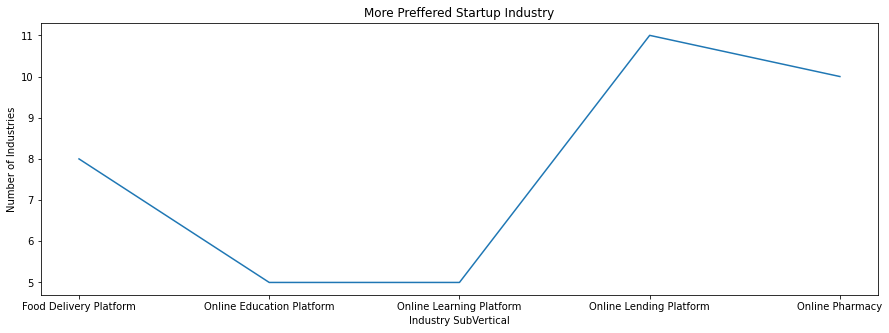

In [33]:
#Plotting the data
sns.lineplot(s_industry.index,s_industry.values)
plt.xlabel("Industry SubVertical")
plt.ylabel("Number of Industries")
plt.title('More Preffered Startup Industry')
plt.show()

Consumer Internet and Online Leading Platforms are more prefferd startups in India.

### Does Location Plays an Important role for startups

In [34]:
df_startup['City  Location']=df_startup["City  Location"].replace('Bangaluru','Bangalore')
city=df_startup['City  Location'].value_counts().head()
print(city)

Bangalore    701
Mumbai       564
New Delhi    424
Gurgaon      291
nan          178
Name: City  Location, dtype: int64


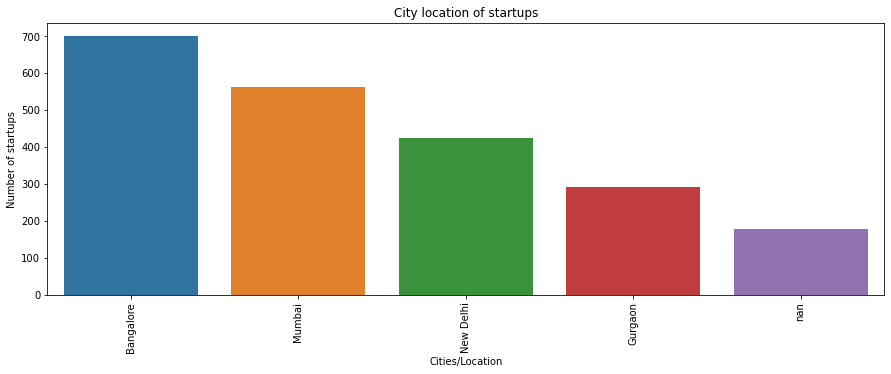

In [35]:
#Plotting the data
sns.barplot(city.index,city.values)
plt.xticks(rotation=90)
plt.xlabel("Cities/Location")
plt.ylabel("Number of startups")
plt.title("City location of startups")
plt.show()

Banglore have the highest number of startups in the country (30%)!

### Who plays the most important role in a startup.

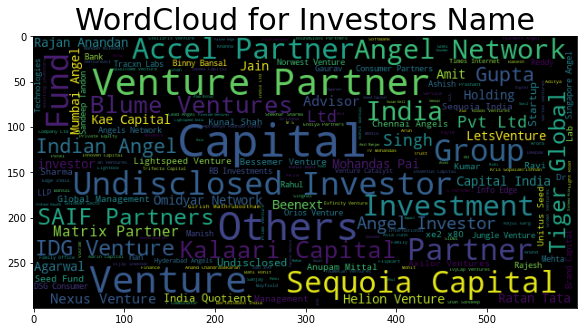

In [42]:
from wordcloud import WordCloud
name=df_startup['Investors Name'][~pd.isnull(df_startup["Investors Name"])]
wordcloud=WordCloud(max_font_size=50,width=600,height=300).generate(" ".join(name))
plt.imshow(wordcloud)
plt.title("WordCloud for Investors Name",fontsize=30)
plt.show()

Capital, Venture, Angel etc have funded more than any other investing agencies.

### What are different kinds of Funding for Startups

In [50]:
investment=df_startup['InvestmentnType'].value_counts().head()
print(investment)

Private Equity         1355
Seed Funding           1349
Seed Angel Funding       78
Seed/ Angel Funding      60
Seed\\nFunding           30
Name: InvestmentnType, dtype: int64


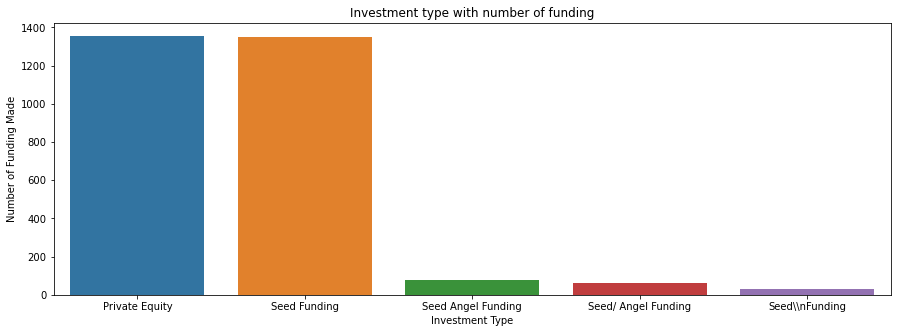

In [54]:
sns.barplot(investment.index,investment.values)
plt.xlabel("Investment Type")
plt.ylabel("Number of Funding Made")
plt.title("Investment type with number of funding")
plt.show()

This conclude, that Private Equity made the highest number of fundings.